In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [4]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
df.shape

(5160, 9)

In [7]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target
##taking sample data
df=df.sample(frac=0.25)

In [9]:
#independent feature
x=df.iloc[:,:-1]
#dependent feature
y=df.iloc[:,-1]


In [10]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
464,2.7372,52.0,4.443804,1.005764,1424.0,2.051873,37.87,-122.27
2732,1.3882,15.0,3.929530,1.100671,1024.0,3.436242,32.80,-115.56
15166,3.9531,17.0,5.505435,1.005435,1297.0,2.349638,32.95,-117.05
9876,2.4864,41.0,4.887850,1.116822,1890.0,2.943925,36.60,-121.85
6788,4.4306,52.0,5.466501,1.066998,1238.0,3.071960,34.09,-118.15


In [11]:
## train test split

In [26]:
### train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [46]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
y_pred=regressor.predict(x_test)

In [48]:
y_pred

array([0.995, 3.866, 3.273, ..., 2.171, 1.219, 1.543])

In [49]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [50]:
score

0.47233319951338637

In [51]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [52]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [55]:
regressorcv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [56]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'max_features': 'auto',
 'splitter': 'random'}

In [57]:
DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [59]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

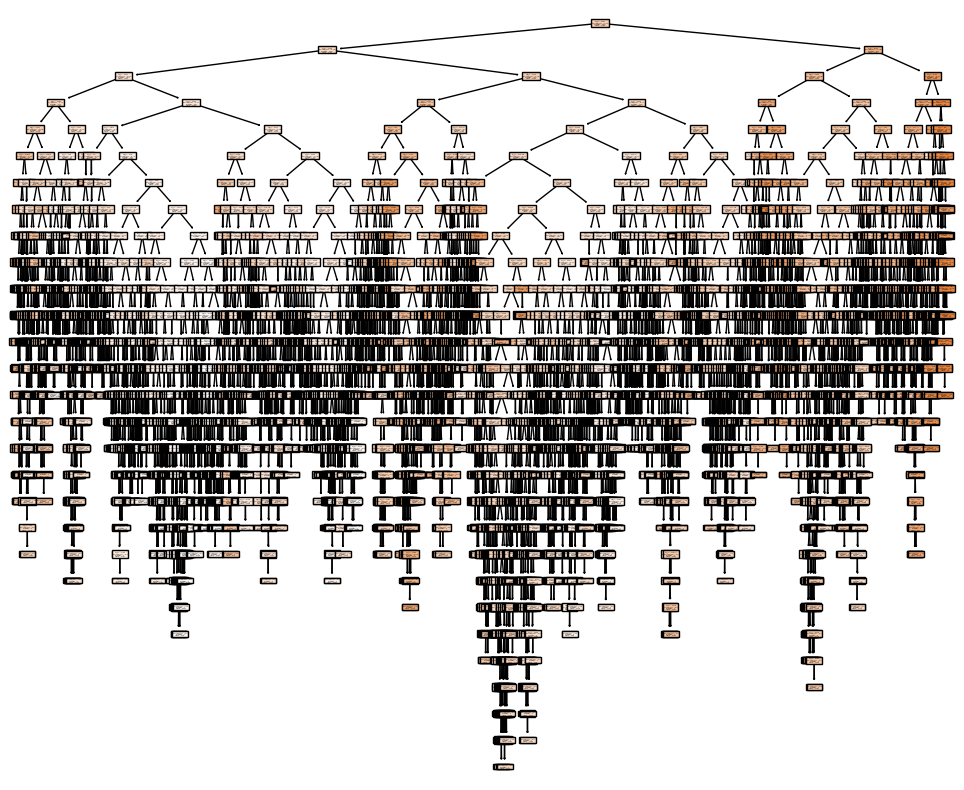

In [60]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

[Text(0.626966056714914, 0.9827586206896551, 'x[0] <= 4.861\nsquared_error = 1.319\nsamples = 3457\nvalue = 2.068'),
 Text(0.33345059316454567, 0.9482758620689655, 'x[0] <= 2.933\nsquared_error = 0.798\nsamples = 2642\nvalue = 1.709'),
 Text(0.11428188270246478, 0.9137931034482759, 'x[2] <= 3.811\nsquared_error = 0.522\nsamples = 1203\nvalue = 1.321'),
 Text(0.04142254635407381, 0.8793103448275862, 'x[5] <= 3.454\nsquared_error = 0.711\nsamples = 273\nvalue = 1.784'),
 Text(0.01917844089855589, 0.8448275862068966, 'x[5] <= 2.137\nsquared_error = 0.885\nsamples = 162\nvalue = 2.075'),
 Text(0.007871278302727758, 0.8103448275862069, 'x[6] <= 37.815\nsquared_error = 1.373\nsamples = 45\nvalue = 2.571'),
 Text(0.005473346407559279, 0.7758620689655172, 'x[7] <= -118.22\nsquared_error = 1.316\nsamples = 38\nvalue = 2.781'),
 Text(0.003886610804064896, 0.7413793103448276, 'x[6] <= 37.785\nsquared_error = 1.124\nsamples = 27\nvalue = 3.209'),
 Text(0.0026386165091816724, 0.7068965517241379, 'x

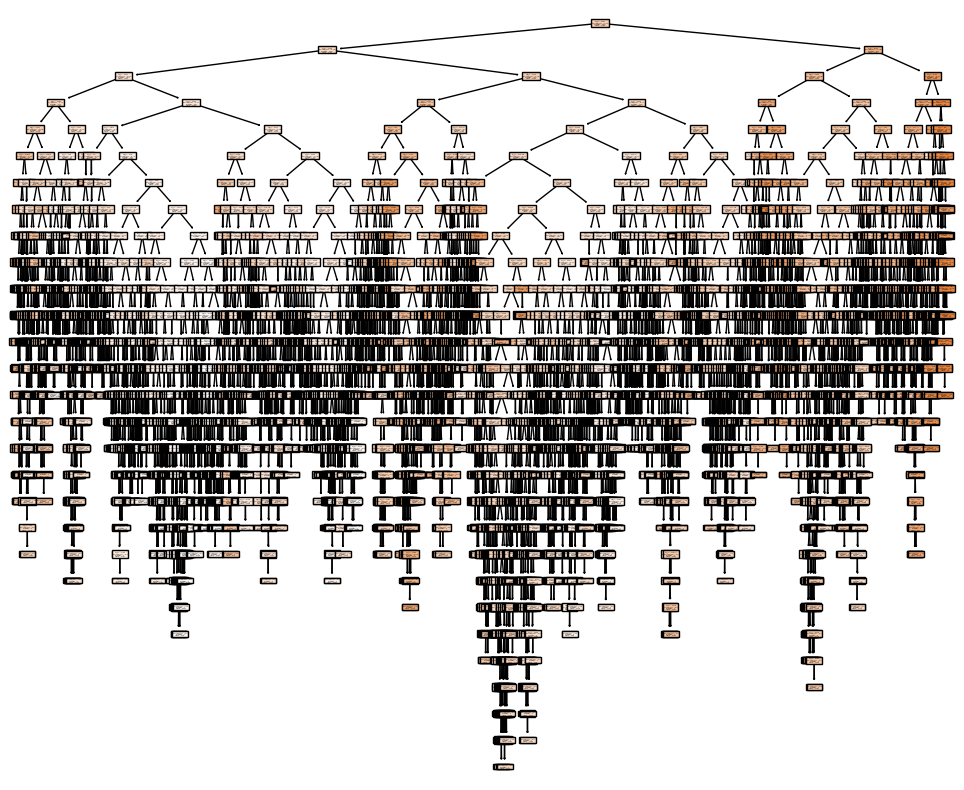

In [61]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)


In [62]:
y_pred=regressorcv.predict(x_test)

In [63]:
r2_score(y_pred,y_test)

0.25726977215183533